<a href="https://colab.research.google.com/github/hilamhi/bt2/blob/main/Ch%C3%A0o_m%E1%BB%ABng_b%E1%BA%A1n_%C4%91%E1%BA%BFn_v%E1%BB%9Bi_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape X_train_scaled: (885, 2500)
Shape y_train: (885,)
Huấn luyện hoàn tất sau 1000 epochs.
Loss cuối cùng: 0.686198


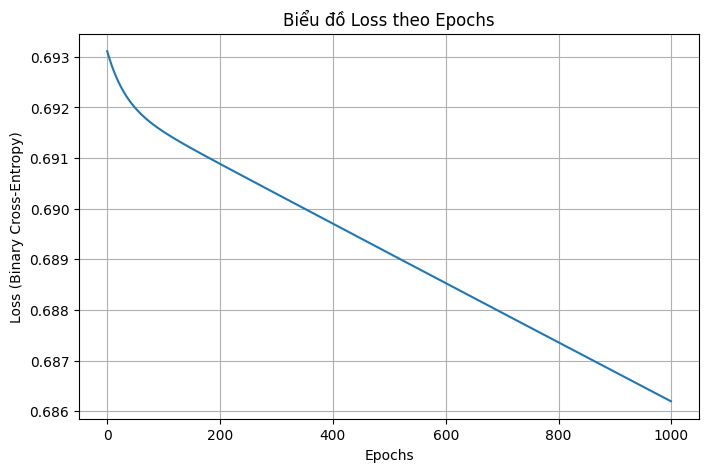


--- Kết quả Đánh Giá Mô Hình ---
Accuracy: 0.5180
Recall:   0.0000
F1-Score: 0.0000


(np.float64(0.5180180180180181), np.float64(0.0), 0.0)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    """Tính hàm Sigmoid."""
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

def predict_prob(X, w, b):
    """Tính xác suất dự đoán P(Y=1|X)."""
    z = np.dot(X, w) + b
    return sigmoid(z)

def predict(X, w, b, threshold=0.5):
    """Dự đoán nhãn cuối cùng (0 hoặc 1)."""
    prob = predict_prob(X, w, b)
    return (prob >= threshold).astype(int)

def loss(X, y, w, b):
    """Tính giá trị hàm mất mát (Log Loss)."""
    m = y.shape[0]
    prob = predict_prob(X, w, b)
    prob = np.clip(prob, 1e-12, 1 - 1e-12)
    cost = (-1/m) * np.sum(y * np.log(prob) + (1 - y) * np.log(1 - prob))
    return cost

# Hàm Gradient (Đạo hàm)
def grad(X, y, w, b):
    """Tính Gradient (dw và db)."""
    m = y.shape[0]
    y_hat = predict_prob(X, w, b)
    delta = y_hat - y

    # Gradient của trọng số (w)
    dw = (1/m) * np.dot(X.T, delta)

    # Gradient của bias (b)
    db = (1/m) * np.sum(delta)

    return dw, db

# --- 2. Hàm Huấn Luyện (Dựa trên Image 2) ---

def gradient_descent(X, y, w_init, b_init, lr=0.02, epochs=1000):
    """Thực hiện Gradient Descent."""
    w = w_init.copy()
    b = b_init
    loss_history = []

    for i in range(epochs):
        dw, db = grad(X, y, w, b)

        # Cập nhật tham số
        w = w - lr * dw
        b = b - lr * db

        # Ghi lại Loss
        l = loss(X, y, w, b)
        loss_history.append(l)

        # Hiển thị (giống như yêu cầu trong ảnh)
        # print(f"Epoch {i+1}/{epochs}, Loss: {l:.4f}")

    return w, b, loss_history

# --- 3. Hàm Đánh Giá (Yêu cầu Bài Tập) ---

def accuracy_score(y_true, y_pred):
    """Tính Accuracy."""
    return np.mean(y_true == y_pred)

def recall_score(y_true, y_pred):
    """Tính Recall (Sensitivity)."""
    TP = np.sum((y_pred == 1) & (y_true == 1))
    FN = np.sum((y_pred == 0) & (y_true == 1))
    if TP + FN == 0:
        return 0.0
    return TP / (TP + FN)

def f1_score_metric(y_true, y_pred):
    """Tính F1-Score."""
    precision = np.sum((y_pred == 1) & (y_true == 1)) / np.sum(y_pred == 1) if np.sum(y_pred == 1) > 0 else 0
    recall = recall_score(y_true, y_pred)

    if precision + recall == 0:
        return 0.0
    return 2 * (precision * recall) / (precision + recall)


# --- 4. Lớp `binaryl` (Yêu cầu Bài Tập 2 & 3) ---

class binaryl:
    def __init__(self, lr=0.0001, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.w = None  # Trọng số
        self.b = 0     # Bias (Khởi tạo bằng 0)
        self.loss_history = []

    def fit(self, X, y):
        """Huấn luyện mô hình."""
        n_features = X.shape[1]

        # Khởi tạo w và b
        # Bài 3 yêu cầu khởi tạo w = np.zeros(X.shape[1], 1) và thêm bias
        self.w = np.zeros((n_features, 1)) # Khởi tạo w là vector cột
        self.b = 0 # Bias được khởi tạo riêng

        # Để tương thích với hàm grad/gd đã viết (dùng w là vector 1D)
        # Ta sẽ dùng w_1d cho hàm grad và gd, nhưng lớp sẽ lưu w_2d
        w_1d_init = np.zeros(n_features)

        # Sử dụng hàm gradient_descent đã định nghĩa (cần điều chỉnh nhẹ cho bias)
        # Lưu ý: Hàm grad/gd ở trên dùng w 1D, nên ta cần đảm bảo sự nhất quán

        # Ta điều chỉnh lại để sử dụng trực tiếp trong class cho chuẩn:
        w_final, b_final, self.loss_history = gradient_descent(
            X, y, w_1d_init, self.b, self.lr, self.epochs
        )

        # Cập nhật lại w và b của class
        self.w = w_final.reshape(-1, 1) # Lưu dưới dạng vector cột (n, 1)
        self.b = b_final
        print(f"Huấn luyện hoàn tất sau {self.epochs} epochs.")
        print(f"Loss cuối cùng: {self.loss_history[-1]:.6f}")


    def predict_prob(self, X):
        """Dự đoán xác suất."""
        # Điều chỉnh lại hàm predict_prob để dùng self.w (vector 1D) và self.b
        z = np.dot(X, self.w.flatten()) + self.b
        return sigmoid(z)

    def predict(self, X):
        """Dự đoán nhãn."""
        prob = self.predict_prob(X)
        return (prob >= 0.5).astype(int)

    def evaluate(self, X_test, y_test):
        """Đánh giá mô hình."""
        y_pred = self.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score_metric(y_test, y_pred)

        print("\n--- Kết quả Đánh Giá Mô Hình ---")
        print(f"Accuracy: {acc:.4f}")
        print(f"Recall:   {rec:.4f}")
        print(f"F1-Score: {f1:.4f}")
        return acc, rec, f1

# --- 5. Mô Phỏng Dữ Liệu và Chạy Mô Hình ---

# Giả lập dữ liệu theo shape đã cho trong ảnh (885 train, 222 test)
np.random.seed(42)
N_train = 885
N_test = 222
N_features = 2500

# Dữ liệu giả lập
X_train_scaled = np.random.rand(N_train, N_features)
y_train = np.random.randint(0, 2, N_train) # Nhãn 0 hoặc 1
X_test_scaled = np.random.rand(N_test, N_features)
y_test = np.random.randint(0, 2, N_test)

# Điều chỉnh y_train và y_test thành vector cột (n, 1) nếu cần thiết cho một số hàm,
# nhưng các hàm trên được viết để chấp nhận (n,)
# Nếu bạn làm việc với dữ liệu thực tế, hãy đảm bảo y_train và y_test có shape (m,)

print(f"Shape X_train_scaled: {X_train_scaled.shape}")
print(f"Shape y_train: {y_train.shape}")

# --- Thực thi Yêu cầu Bài Tập ---

# Khởi tạo và Huấn luyện mô hình
model = binaryl(lr=0.0001, epochs=1000) # Dùng lr nhỏ hơn 0.02 (như trong ảnh) cho ổn định
model.fit(X_train_scaled, y_train)

# Vẽ biểu đồ Loss (Yêu cầu cuối ảnh 2)
plt.figure(figsize=(8, 5))
plt.plot(model.loss_history)
plt.title('Biểu đồ Loss theo Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (Binary Cross-Entropy)')
plt.grid(True)
plt.show()

# Đánh giá mô hình
model.evaluate(X_test_scaled, y_test)